<h1> MFI, Money Inflow Index provides technial signal for entry and exit </h1>
0. Get instrument historical data <br>
1. Calculate the Typical Price for each of the last 14 periods. <br>
2. For each period, mark whether the typical price was higher or lower than the prior period. This will tell you whether Raw Money Flow is positive or negative <br>



In [6]:
import warnings
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
stock = 'ABT'
df = web.DataReader(stock, data_source='yahoo', start='01-01-2020')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.959999,85.800003,86.059998,86.949997,4969000.0,85.885757
2020-01-03,86.669998,85.589996,85.750000,85.889999,4747000.0,84.838737
2020-01-06,86.360001,85.209999,85.620003,86.339996,5631700.0,85.283234
2020-01-07,86.300003,85.540001,85.769997,85.860001,3408100.0,84.809113
2020-01-08,86.660004,85.930000,86.239998,86.209999,5693900.0,85.154816
...,...,...,...,...,...,...
2020-10-05,108.650002,107.180000,107.180000,108.559998,3603400.0,108.559998
2020-10-06,108.769997,106.050003,108.559998,106.250000,3992600.0,106.250000
2020-10-07,108.180000,106.930000,107.370003,107.739998,4162400.0,107.739998


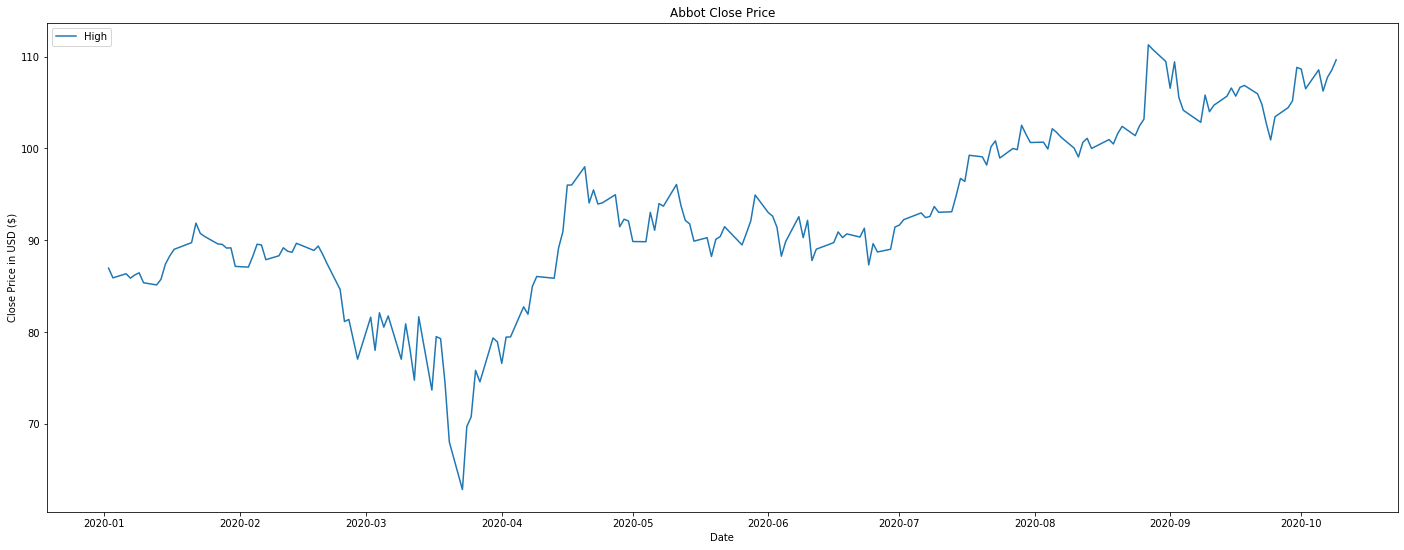

In [11]:
plt.figure(figsize=(24.2,9))
plt.plot(df['Close'], label = 'Closing Price')
plt.title('Abbot Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [ ]:
# calculate typical price
